# H9.2  C-SVM with standard parameters

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from svmutil import *
from sklearn import svm
from sklearn.model_selection import KFold
%matplotlib inline

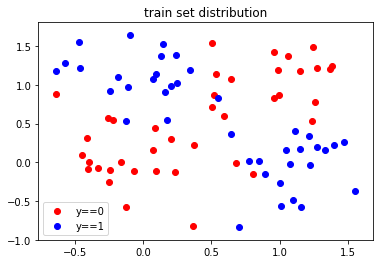

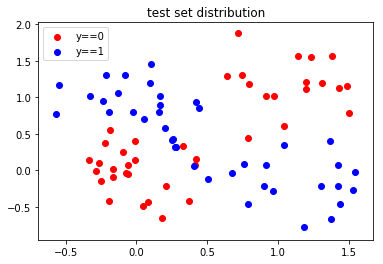

In [2]:
def SampleMixtureNormal2D(m1, s1, m2, s2): 
    # m1, m2 are the means, s1, s2 the variances 
    if (np.random.choice([0,1])):
        return np.random.multivariate_normal(m1, [[s1, 0], [0, s1]])
    else:
        return np.random.multivariate_normal(m2, [[s2, 0], [0, s2]])

def getSamples(m1, m2, m3, m4, s, N = 0, M = 0):
    samples = np.zeros((N + M, 2))
    labels = np.zeros(N + M)
    for i in range(N):
        samples[i] = SampleMixtureNormal2D(m1, s, m2, s)
        labels[i] = 1
    for i in range(M):
        samples[i + N] = SampleMixtureNormal2D(m3, s, m4, s)
        labels[i + N] = 0
    return samples, labels

train_input, train_labels = getSamples([0, 1], [1, 0], [0, 0], [1, 1], 0.1, 40, 40)
test_input, test_labels = getSamples([0, 1], [1, 0], [0, 0], [1, 1], 0.1, 40, 40)

# print train_input=

plt.scatter((train_input[train_labels==0])[:, 0], (train_input[train_labels==0])[:, 1],color='red', label='y==0')
plt.scatter((train_input[train_labels==1])[:, 0],(train_input[train_labels==1])[:, 1], color='b', label='y==1')
plt.legend()
plt.title('train set distribution')
plt.show()

plt.scatter((test_input[test_labels==0])[:, 0], (test_input[test_labels==0])[:, 1],color='red', label='y==0')
plt.scatter((test_input[test_labels==1])[:, 0],(test_input[test_labels==1])[:, 1], color='b', label='y==1')
plt.legend()
plt.title('test set distribution')
plt.show()

In [3]:
svc = svm.SVC().fit(train_input, train_labels)
pred_labels = svc.predict(test_input)
acc = sum(pred_labels == test_labels) * 1.0 / len(test_labels)
print "SVM with standard parameters using RBF kernel: acc is %f" % acc

SVM with standard parameters using RBF kernel: acc is 0.900000


num of SVs: 51


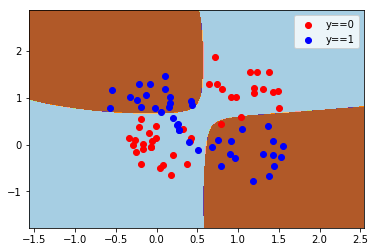

In [4]:
h = .01  # step size in the mesh
# create a mesh to plot in
x_min, x_max = test_input[:, 0].min() - 1, test_input[:, 0].max() + 1
y_min, y_max = test_input[:, 1].min() - 1, test_input[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
sv = svc.support_vectors_
print 'num of SVs: %d' % len(sv)

plt.contourf(xx, yy, Z.reshape(xx.shape), cmap=plt.cm.Paired)
plt.scatter((test_input[test_labels==0])[:, 0], (test_input[test_labels==0])[:, 1],color='red', label='y==0')
plt.scatter((test_input[test_labels==1])[:, 0],(test_input[test_labels==1])[:, 1], color='b', label='y==1')
plt.legend()
plt.show()

# H9.3: C-SVM parameter optimization

## a

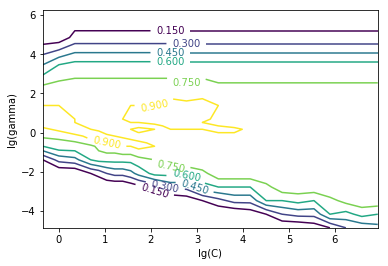

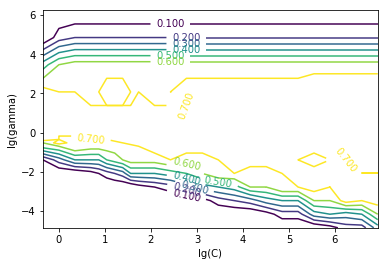

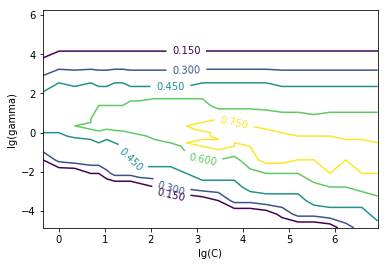

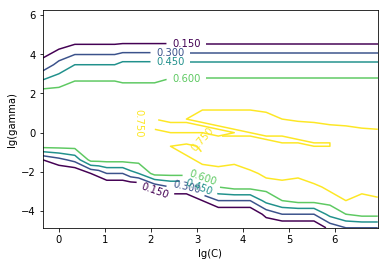

Optimal (C, gamma) is (45.254834, 0.707107), accuracy is 0.900000


In [5]:
C_options = np.array([2**-0.5, 1, 2**0.5, 2**1, 2**1.25, 2**1.5, 2**1.75, 2**2, 2**2.25, 2**2.5, 2**3, 2**3.5, 2**4, 2**4.5, 2**5, 2**5.5, 2**6, 2**6.5, 2**7, 2**7.5, 2**8, 2**8.5, 2**9, 2**9.5, 2**10])
gamma_options = np.array([2**-7, 2**-6, 2**-5, 2**-4, 2**-3, 2**-2, 2**-1, 2**-0.75, 2**-0.5, 2**-0.25, 2**0, 2**0.25, 2**0.5, 2**0.75, 2**1, 2**2, 2**3, 2**5, 2**7, 2**9])
C, gamma = np.meshgrid(C_options, gamma_options)
params = np.array(zip(C.flatten(), gamma.flatten()))

fold = 4
fold_length = len(train_labels)/fold
kf = KFold(n_splits=fold)
kf.get_n_splits(train_input)
optimal_params = params[0,:]
best_acc = 0.0

def calc_acc(test_labels, pred_labels):
    acc = sum(pred_labels == test_labels) * 1.0 / len(test_labels)
    return acc

for train_index, test_index in kf.split(train_input):
    acc = np.zeros(len(params))
    j = 0
#     print("TRAIN:", train_index, "TEST:", test_index)
    for param in params:
        # train
#         print param
#         print j
        svc = svm.SVC(C=param[0], gamma=param[1]).fit(train_input[train_index], train_labels[train_index])
        pred_labels = svc.predict(train_input[test_index])
        # predict
        acc[j] = calc_acc(train_labels[test_index], pred_labels)
#         print acc[j], acc.max()
        if(acc[j] == acc.max()):
#             print "got better"
            optimal_params = param
            best_acc = acc[j]
        j += 1
    acc = acc.reshape(C.shape)
    CS = plt.contour(np.log(C), np.log(gamma),acc)
    plt.clabel(CS, inline=1)
    plt.xlabel('lg(C)')
    plt.ylabel('lg(gamma)')
    plt.show()
print "Optimal (C, gamma) is (%f, %f), accuracy is %f" % (optimal_params[0], optimal_params[1], best_acc)


## b

In [13]:
print optimal_params
svc = svm.SVC(C = optimal_params[0], gamma=optimal_params[1]).fit(train_input, train_labels)
pred_labels = svc.predict(test_input)
print calc_acc(test_labels, pred_labels)

[ 45.254834     0.70710678]
0.875


num of SVs: 22


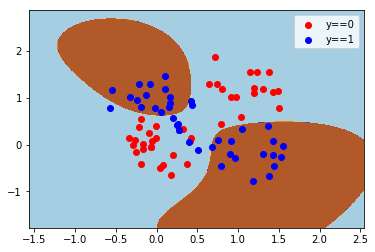

In [14]:
h = .01  # step size in the mesh
# create a mesh to plot in
x_min, x_max = test_input[:, 0].min() - 1, test_input[:, 0].max() + 1
y_min, y_max = test_input[:, 1].min() - 1, test_input[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
sv = svc.support_vectors_
print 'num of SVs: %d' % len(sv)

plt.contourf(xx, yy, Z.reshape(xx.shape), cmap=plt.cm.Paired)
plt.scatter((test_input[test_labels==0])[:, 0], (test_input[test_labels==0])[:, 1],color='red', label='y==0')
plt.scatter((test_input[test_labels==1])[:, 0],(test_input[test_labels==1])[:, 1], color='b', label='y==1')
plt.legend()
plt.show()

## c

Compared to standard parameters, we got less support vectors while using 'optimal' parameters. About the accuracy, we have run both several times, we didn't see obvious improvement (sometimes even worse). Also, for the 'optimal' parameters, we could see over fitting. 

If dividing C by 4, we could see a lower generalization error rate.